In [9]:
import pandas as pd
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
en_sws = stopwords.words('english')
en_sws.extend(['yes', 'like', 'would', 'need', 'much', 'one', 'also', "n't"])
import spacy
nlp_lem = spacy.load('en_core_web_sm')
from string import punctuation
import re
from operator import itemgetter

In [15]:
!pip3 -V

pip 20.3.3 from /Users/darapetruhnenko/Library/Python/3.8/lib/python/site-packages/pip (python 3.8)


In [17]:
musk = pd.read_csv('../../python_for_CL/pandas/elonmusk.csv')

In [272]:
musk.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,weekday
0,1282939902531796993,1282933079431151618,1594711683000,2020-07-14,07:28:03,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN,Tuesday
1,1282844872571904000,1282801938111791104,1594689026000,2020-07-14,01:10:26,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN,Tuesday
2,1282805559834492929,1282758532312584193,1594679653000,2020-07-13,22:34:13,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN,Monday


In [35]:
musk['weekday'] = musk['date'].apply(lambda x: dt.date(int(x.split('-')[0]), 
                                                       int(x.split('-')[1]),
                                                       int(x.split('-')[2])).strftime('%A'))

<AxesSubplot:>

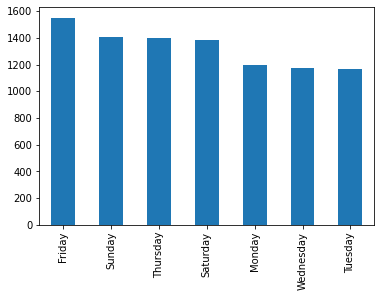

In [45]:
musk['weekday'].value_counts().plot(kind='bar')

In [261]:
def get_tweet_list(weekday):
    return list(musk.loc[musk['weekday'] == weekday, 'tweet'])

monday = get_tweet_list('Monday')
tuesday = get_tweet_list('Tuesday')
wednesday = get_tweet_list('Wednesday')
thursday = get_tweet_list('Thursday')
friday = get_tweet_list('Friday')
saturday = get_tweet_list('Saturday')
sunday = get_tweet_list('Sunday')
days = [monday, tuesday, wednesday, thursday, friday, saturday, sunday]

In [269]:
def preprocessing(text):
    tokens = [word.strip(punctuation) for word in word_tokenize(text)]
    clean_tokens = [word.lower() for word in tokens if word]
    clean_tokens = [word for word in tokens if len(word) > 2]
    clean_tokens = [word for word in clean_tokens if 
                    word not in en_sws]
    clean_lemmas = [nlp_lem(word)[0].lemma_ for 
                    word in clean_tokens]
    return clean_lemmas

In [255]:
def get_topn_words(vector, feature_names, n):
    '''вовращает n самых частотных слов по данному вектору'''
    tfidf_scores = [(feature_names[col], vector[0, col]) for 
                    col in vector.nonzero()[1]]
    freq_list = [pair[0] for pair in sorted(tfidf_scores, key=itemgetter(1), 
                                                       reverse=True)]
    return freq_list[:n]

In [262]:
def to_str(day):
    return '\n'.join(day)
    
str_days = [to_str(day) for day in days] 

In [263]:
pattern = re.compile(r'https?.+?[\n\xa0]')
pattern2 = re.compile(r'pic.twitter.*\n')
pattern3 = re.compile(r'via @.+')

In [264]:
str_days = [pattern.sub(' ', day) for day in str_days]
str_days = [pattern2.sub(' ', day) for day in str_days]
str_days = [pattern3.sub(' ', day) for day in str_days]

In [270]:
tfidf_vec = TfidfVectorizer(tokenizer=preprocessing, ngram_range=(2,3))
vectors = tfidf_vec.fit_transform(str_days)
feature_names = tfidf_vec.get_feature_names()
monday_voc = get_topn_words(vectors[0],feature_names, 10)
tuesday_voc = get_topn_words(vectors[1],feature_names, 10)
wednesday_voc = get_topn_words(vectors[2], feature_names, 10)
thursday_voc = get_topn_words(vectors[3],feature_names, 10)
friday_voc = get_topn_words(vectors[4],feature_names, 10)
saturday_voc = get_topn_words(vectors[5], feature_names, 10)
sunday_voc = get_topn_words(vectors[6], feature_names, 10)

In [271]:
data = [monday_voc, tuesday_voc, wednesday_voc, thursday_voc, friday_voc, saturday_voc, sunday_voc]
freq_df = pd.DataFrame(data,
                      index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                      columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
freq_df

,1,2,3,4,5,6,7,8,9,10
Monday,volume production,build site,next year,falcon heavy,come soon,early next year,later week,early next,order tesla,powerful people
Tuesday,come soon,cape canaveral,pickup truck,make sense,next year,congratulation tesla team,fly car,double standard,tesla team,year ago
Wednesday,falcon heavy,next month,next year,come soon,pay 55,landing engine,guide wheel,night mode,end month,center screen
Thursday,next week,come soon,true lopezlinette,payload orbit,moment inertia,pressure pure oxygen,high pressure pure,rear wheel,year history,peak power
Friday,come soon,next week,next year,boring company,falcon heavy,good point,water tower,lot work,hospital operate room,door work
Saturday,come soon,take time,look good,falcon heavy,free supercharge,free lifetime supercharge,autopilot full self,pitch angle,world good,lifetime supercharge
Sunday,tesla owner,make sense,come soon,dual motor,sorry hear,model performance,probably make,light stop sign,moo moo,zero incentive
